In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define fxnn to integrate

In [2]:
def dfdx(x,f):
    return x**2 + x


### Define its integral

In [4]:
def f_int(x,C):
    return (x**3)/3. + 0.5*x**2 + C

## Define 2nd order RK scheme

In [5]:
def rk2_core(x_i,f_i,h,g):
    
    # Advance f by step of h
    
    # Half step
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    # Full step
    f_ipo = f_i + h*g(x_ipoh,f_ipoh)
    
    return f_ipo

### Define a wrapper for RK2

In [7]:
def rk2(dfdx, a, b, f_a, N):
    
    
    # dfdx is derivative wrt to x
    # a is lower bound
    #
    #
    #
    
    #
    x = np.linspace(a,b,N)
    
    # 
    h = x[1] - x[0]
    
    # 
    f = np.zeros(N,dtype=float)
    
    #
    f[0] = f_a
    
    #
    for i in range(1,N):
        f[i] = rk2_core(x[i-1], f[i-1], h, dfdx)
        
    return x,f

### Define 4th order RK2

In [11]:
def rk4_core(x_i,f_i,h,g):
    
    # Advance f by step of h
    
    # Half step
    x_ipoh = x_i + 0.5*h
    
    #
    x_ipo = x_i + h
    
    #
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    k_4 = h*g(x_ipo, f_i + k_3)
    
    f_ipo = f_i + (k_1 + 2*k_2 + 2*k_3 + k_4)/6.
    
    
    return f_ipo

### Define wrapper for RK4

In [9]:
def rk4(dfdx, a, b, f_a, N):
    
    
    # dfdx is derivative wrt to x
    # a is lower bound
    # b is the upper bound
    # f_a is the boundary condition at a
    # N is # of steps
    
    # Define steps
    x = np.linspace(a,b,N)
    
    # Single step size
    h = x[1] - x[0]
    
    # Array to hold f
    f = np.zeros(N,dtype=float)
    
    # Value of f at a
    f[0] = f_a
    
    # Evolve f along x
    for i in range(1,N):
        f[i] = rk4_core(x[i-1], f[i-1], h, dfdx)
        
    return x,f

### Perform integration

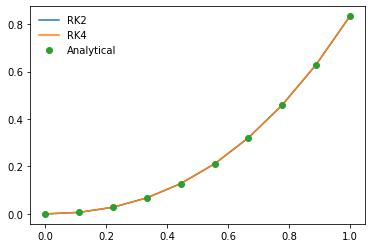

In [12]:
a = 0.0 
b = 1.0
f_a = 0.0
N = 10

# Use RK methods
x_2, f_2 = rk2(dfdx, a, b, f_a, N)
x_4, f_4 = rk4(dfdx, a, b, f_a, N)

x = x_2.copy()

plt.plot(x_2, f_2, label="RK2")
plt.plot(x_4, f_4, label='RK4')
plt.plot(x, f_int(x, f_a), 'o', label='Analytical')
plt.legend(frameon=False)